In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
train_df = pd.read_csv('../datasets/mnist/data/csv/mnist_train.csv')
train_df

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59994,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59995,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train_data = np.array(train_df)
m_train, n_train = train_data.shape
print(m_train, n_train) # m is number of data, n is pixel values
train_data

59999 785


array([[0, 0, 0, ..., 0, 0, 0],
       [4, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [5, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [8, 0, 0, ..., 0, 0, 0]])

In [7]:
np.random.shuffle(train_data)
train_data

array([[5, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       [4, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [7, 0, 0, ..., 0, 0, 0],
       [3, 0, 0, ..., 0, 0, 0]])

In [8]:
train = train_data.T

X_train = train[1:n_train]
X_train = X_train / 255
Y_train = train[0]

print(train.shape)
print(X_train.shape)
print(Y_train.shape)
print(Y_train)

(785, 59999)
(784, 59999)
(59999,)
[5 9 4 ... 0 7 3]


In [9]:
def init_param():
    W1 = np.random.rand(128, 784) - 0.5
    b1 = np.random.rand(128, 1) - 0.5
    W2 = np.random.rand(64, 128) - 0.5
    b2 = np.random.rand(64, 1) - 0.5
    W3 = np.random.rand(10, 64) - 0.5
    b3 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2, W3, b3

In [10]:
def ReLU(Z):
    return np.maximum(Z, 0)

In [11]:
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

In [12]:
def forward_prop(W1, b1, W2, b2, W3, b3, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    
    Z2 = W2.dot(A1) + b2
    A2 = ReLU(Z2)
    
    Z3 = W3.dot(A2) + b3
    A3 = softmax(Z3)
    
    return Z1, A1, Z2, A2, Z3, A3

In [13]:
def ReLU_deriv(Z):
    return Z > 0

In [14]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [15]:
def backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y):
    m_train = Y.size
    one_hot_Y = one_hot(Y)
    
    dZ3 = A3 - one_hot_Y
    dW3 = 1 / m_train * dZ3.dot(A2.T)
    db3 = 1 / m_train * np.sum(dZ3)

    dZ2 = W3.T.dot(dZ3) * ReLU_deriv(Z2)
    dW2 = 1 / m_train * dZ2.dot(A1.T)
    db2 = 1 / m_train * np.sum(dZ2)
    
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m_train * dZ1.dot(X.T)
    db1 = 1 / m_train * np.sum(dZ1)
    
    return dW1, db1, dW2, db2, dW3, db3

In [16]:
def update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    
    W3 = W3 - alpha * dW3
    b3 = b3 - alpha * db3
    
    return W1, b1, W2, b2, W3, b3

In [17]:
def get_predictions(A):
    return np.argmax(A, 0)

In [18]:
def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

In [19]:
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2, W3, b3 = init_param()
    for i in range(iterations):
        Z1, A1, Z2, A2, Z3, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
        
        dW1, db1, dW2, db2, dW3, db3 = backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y)
        W1, b1, W2, b2, W3, b3 = update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha)

        if i % 10 == 0:
            print(f"Iteration {i}")
            predictions = get_predictions(A3)
            print(f"Accuracy: {get_accuracy(predictions, Y)}")
            print()
    return W1, b1, W2, b2, W3, b3

In [20]:
W1, b1, W2, b2, W3, b3 = gradient_descent(X_train, Y_train, 0.1, 1000)

Iteration 0
[6 4 3 ... 3 1 7] [5 9 4 ... 0 7 3]
Accuracy: 0.08463474391239854

Iteration 10
[5 9 4 ... 3 7 2] [5 9 4 ... 0 7 3]
Accuracy: 0.5387923132052201

Iteration 20
[5 9 4 ... 8 7 2] [5 9 4 ... 0 7 3]
Accuracy: 0.6361439357322622

Iteration 30
[5 9 4 ... 8 7 2] [5 9 4 ... 0 7 3]
Accuracy: 0.6898614976916282

Iteration 40
[5 9 4 ... 8 7 2] [5 9 4 ... 0 7 3]
Accuracy: 0.724428740479008

Iteration 50
[5 9 4 ... 8 7 2] [5 9 4 ... 0 7 3]
Accuracy: 0.7482791379856331

Iteration 60
[5 9 4 ... 8 7 2] [5 9 4 ... 0 7 3]
Accuracy: 0.7663294388239804

Iteration 70
[5 9 4 ... 8 7 2] [5 9 4 ... 0 7 3]
Accuracy: 0.7818296971616193

Iteration 80
[5 9 4 ... 8 7 2] [5 9 4 ... 0 7 3]
Accuracy: 0.7938965649427491

Iteration 90
[5 9 4 ... 8 7 2] [5 9 4 ... 0 7 3]
Accuracy: 0.8051967532792214

Iteration 100
[5 9 4 ... 8 7 2] [5 9 4 ... 0 7 3]
Accuracy: 0.8144802413373556

Iteration 110
[5 9 4 ... 8 7 2] [5 9 4 ... 0 7 3]
Accuracy: 0.8224803746729112

Iteration 120
[5 9 4 ... 8 7 2] [5 9 4 ... 0 7 3]
A

In [27]:
def make_predictions(X, W1, b1, W2, b2, W3, b3):
    _, _, _, _, _, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
    predictions = get_predictions(A3)
    return predictions

In [22]:
def test_prediction(index, W1, b1, W2, b2, W3, b3):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2, W3, b3)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

In [23]:
def show_image(X, index):
    current_image = X[:, index, None]
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [5]
Label:  5


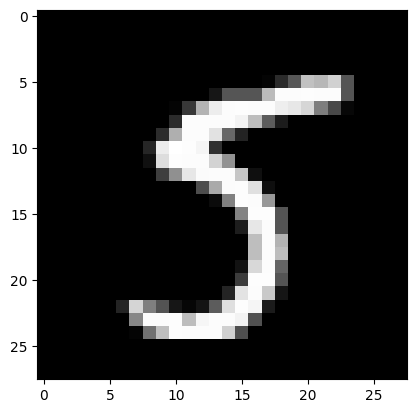

Prediction:  [1]
Label:  1


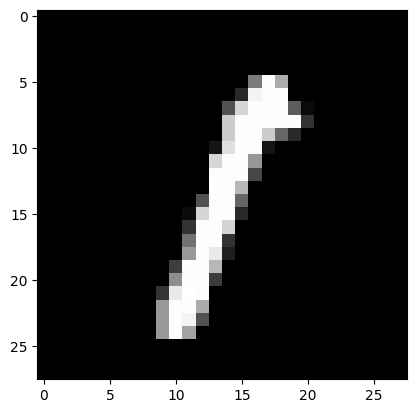

Prediction:  [2]
Label:  2


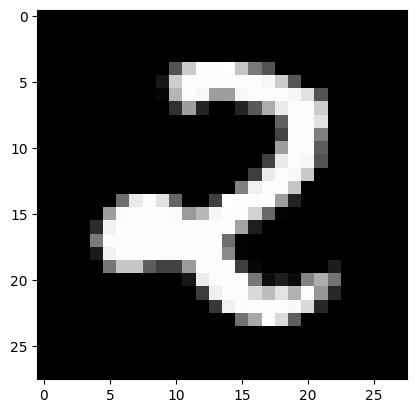

Prediction:  [4]
Label:  4


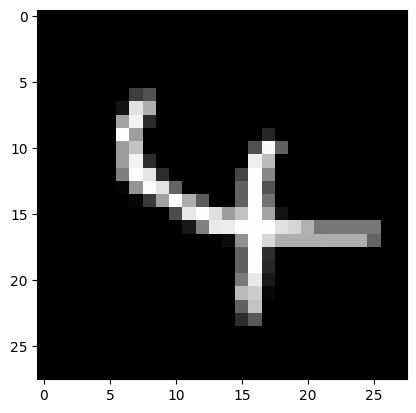

Prediction:  [3]
Label:  3


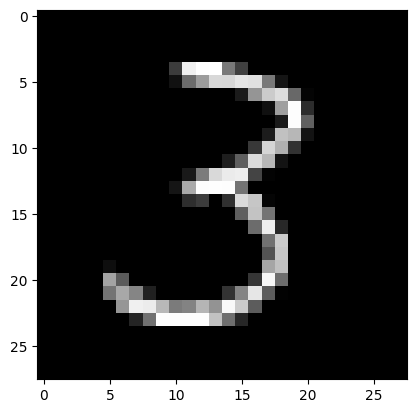

In [24]:
test_prediction(0, W1, b1, W2, b2, W3, b3)
test_prediction(199, W1, b1, W2, b2, W3, b3)
test_prediction(2494, W1, b1, W2, b2, W3, b3)
test_prediction(3931, W1, b1, W2, b2, W3, b3)
test_prediction(5369, W1, b1, W2, b2, W3, b3)

In [30]:
def save_weights(W1, b1, W2, b2, W3, b3):
    np.save("./nn_3layer_weights/W1.npy", W1)
    np.save("./nn_3layer_weights/b1.npy", b1)
    np.save("./nn_3layer_weights/W2.npy", W2)
    np.save("./nn_3layer_weights/b2.npy", b2)
    np.save("./nn_3layer_weights/W3.npy", W3)
    np.save("./nn_3layer_weights/b3.npy", b3)

def load_weights():
    W1 = np.load("./nn_3layer_weights/W1.npy")
    b1 = np.load("./nn_3layer_weights/b1.npy")
    W2 = np.load("./nn_3layer_weights/W2.npy")
    b2 = np.load("./nn_3layer_weights/b2.npy")
    W3 = np.load("./nn_3layer_weights/W3.npy")
    b3 = np.load("./nn_3layer_weights/b3.npy")
    return W1, b1, W2, b2, W3, b3

In [31]:
save_weights(W1, b1, W2, b2, W3, b3)

In [32]:
W1, b1, W2, b2, W3, b3 = load_weights()

In [ ]:
test_df = pd.read_csv('../datasets/mnist/data/csv/mnist_test.csv')
test_df

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9995,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
test_data = np.array(test_df)
m_test, n_test = test_data.shape
print(m_test, n_test)
test_data

9999 785


array([[2, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [4, 0, 0, ..., 0, 0, 0],
       [5, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0]])

In [35]:
test = test_data.T

X_test = test[1:n_test]
X_test = X_test / 255
Y_test = test[0]

print(test.shape)
print(X_test.shape)
print(Y_test.shape)
print(Y_test)

(785, 9999)
(784, 9999)
(9999,)
[2 1 0 ... 4 5 6]


In [37]:
test_predictions = make_predictions(X_test, W1, b1, W2, b2, W3, b3)
get_accuracy(test_predictions, Y_test)

[2 1 0 ... 4 5 6] [2 1 0 ... 4 5 6]


0.9320932093209321

Prediction: 3


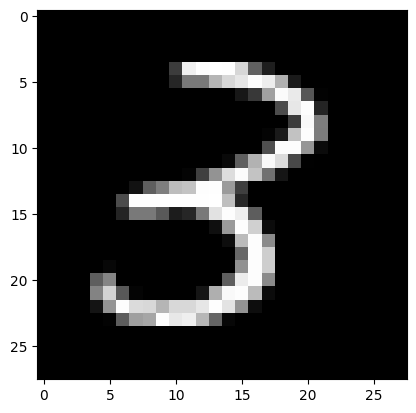

In [41]:
i = 4269
print(f"Prediction: {test_predictions[i]}")
show_image(X_test, i)